# Test Notebook Graph

In [22]:
import pandas as pd
from py2neo import Graph
import matplotlib.pyplot as plt
import numpy as np
#import plotly.express as px

# host + port
host = 'http://localhost:7474'

# select database name
db_name = 'modelparallel'

# credentials for API
user = 'neo4j'
passwd = '1234'

# connect to database
call_graph = Graph(host, auth=(user, passwd), name=db_name)

## Test functions here

In [47]:
df_trend_ranks = call_graph.run("""
    MATCH (m:Molecule)-[:SAME_AS*..]->(m2:Molecule)
    WHERE m.point_in_time = 0 AND m2.point_in_time = 12
    WITH m.formula_string as fs_match, m2.peak_relint_tic/m.peak_relint_tic as overall_trend
    MATCH (m:Molecule)
    WHERE m.formula_string = fs_match
    AND m.point_in_time = 12
    WITH fs_match, overall_trend, m.ar_full_hti as ar_hti, m.ar_full_pt as ar_pt, m.pr_pt as pr_pt
    RETURN fs_match, overall_trend, ar_hti, ar_pt, pr_pt
""").to_data_frame()

In [48]:
df_trend_ranks_sample = df_trend_ranks.sample(n = 500)

df_trend_ranks_sample

,fs_match,overall_trend,ar_hti,ar_pt,pr_pt
2589,C27 H30 O8,0.609823,0.150000,0.242039,0.435947
723,C15 H19 N1 O4,0.867876,0.150000,0.282072,0.598438
541,C14 H18 O4,1.149891,0.192552,0.320391,0.859019
2311,C24 H32 O7,0.607326,0.150000,0.293121,0.650197
607,C14 H6 O8,0.284503,0.150000,0.351810,3.041484
...,...,...,...,...,...
32,C10 H14 O5,3.097169,0.150000,0.339925,1.182124
396,C13 H19 N1 O7,2.079922,0.150000,0.316829,0.898534
1435,C19 H15 N1 O7,0.893728,0.150000,0.286835,0.602173
2798,C30 H34 O10,0.530320,0.875870,0.256128,0.455908


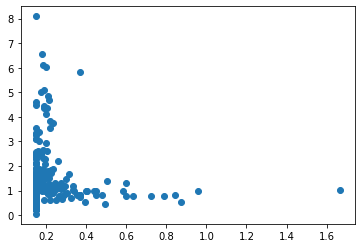

In [51]:
fig = plt.figure()
plt.scatter(df_trend_ranks_sample.ar_hti, df_trend_ranks_sample.overall_trend)

plt.show()